# Section 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import seaborn as sns

# Q1

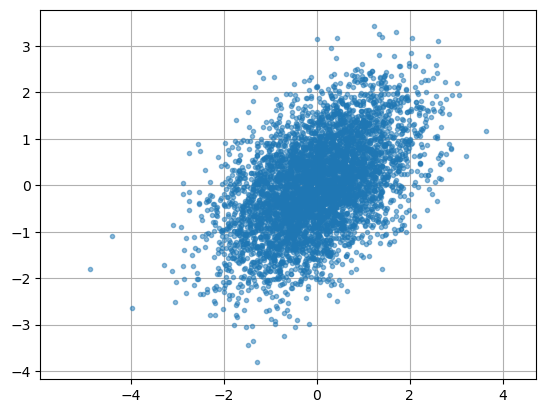

In [2]:
num_samples = 5000

# The desired mean values of the sample.
mu = np.array([0.0, 0.0])

# The desired covariance matrix.
cov = np.array([[1, 0.5],
              [0.5, 1]])

# Generate the random samples.
np.random.seed(100)
x, y = np.random.multivariate_normal(mu, cov, size=num_samples).T

plt.plot(x, y, '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

In [3]:
corr_adjusted = np.corrcoef(x, y)[0, 1]
print("Adjusted correlation coefficient:", corr_adjusted)

Adjusted correlation coefficient: 0.500048444561367


# Q2

In [4]:
# Step 1: Download historical data for S&P 500 index and USD/CAD FX rate
start_date = '2019-12-31'
end_date = '2023-12-31'
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
usdcad_data = yf.download('CAD=X', start=start_date, end=end_date)['Adj Close']

# Combine the two datasets into a DataFrame
orig_data = pd.concat([sp500_data, usdcad_data], axis=1)
orig_data.columns = ['SP500', 'USD_CAD']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Step 2: Deal with missing values
orig_data.isna().sum(axis=0)

SP500      37
USD_CAD     0
dtype: int64

In [6]:
# replace missing value with previous day non-missing value
orig_data = orig_data.ffill()
orig_data.isna().sum(axis=0)

SP500      0
USD_CAD    0
dtype: int64

In [7]:
corr_orig = np.corrcoef(orig_data["SP500"], orig_data["USD_CAD"])[0, 1]
print("Original correlation coefficient:", corr_orig)

Original correlation coefficient: -0.49222193622484506


In [8]:
# Step 3: Generate new cov matrix based on mean and std of the orig data set
desired_corr = 0.5
new_corr_matrix = np.array([[1, desired_corr], [desired_corr, 1]])  # Desired correlation matrix

cov_matrix = orig_data.cov()
std_dev = np.sqrt(np.diag(cov_matrix))  # Standard deviations of the variables
new_cov_matrix = np.outer(std_dev, std_dev) * new_corr_matrix  # New covariance matrix

In [9]:
# Step 4: Generate random samples from the multivariate normal distribution
length = orig_data.shape[0]
np.random.seed(100)
adjusted_data = np.random.multivariate_normal(mean=orig_data.mean(), cov=new_cov_matrix, size=length)

In [10]:
# Convert the adjusted data back to a DataFrame
adjusted_df = pd.DataFrame(adjusted_data, index=orig_data.index, columns=orig_data.columns)

# Step 5: Verify the correlation of the adjusted dataset
adjusted_corr = adjusted_df.corr().iloc[0, 1]
print("Adjusted correlation coefficient:", adjusted_corr)

Adjusted correlation coefficient: 0.4986828327148746


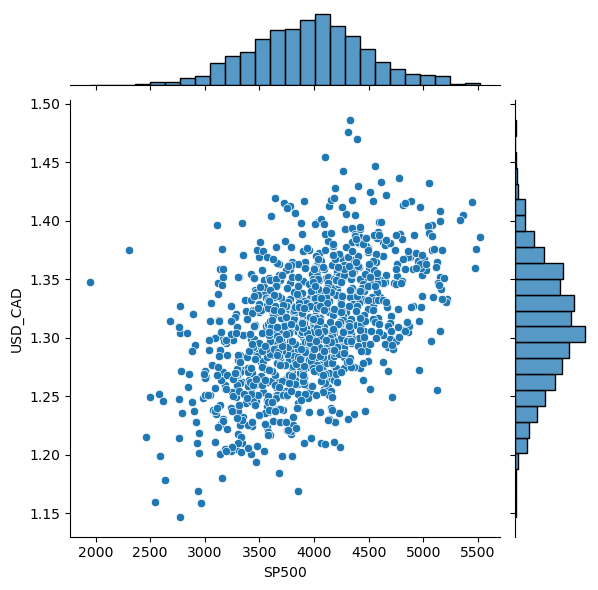

In [11]:
sns.jointplot(data=adjusted_df, x="SP500", y="USD_CAD")

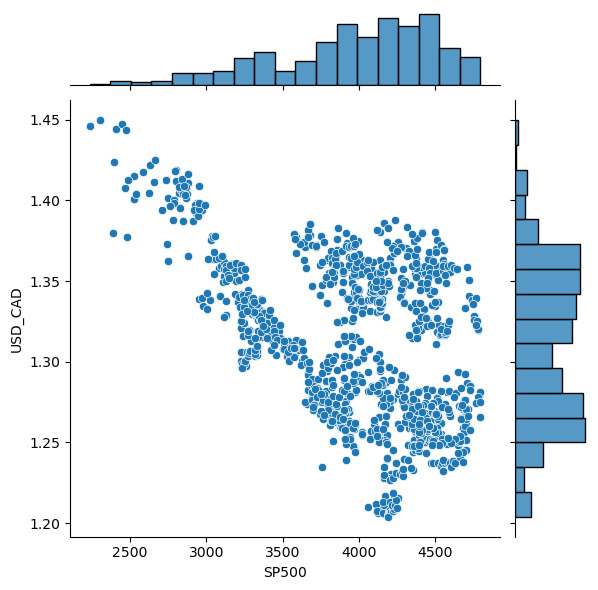

In [12]:
sns.jointplot(data=orig_data, x="SP500", y="USD_CAD")

# Q3

We can use the same logic for multivariate distribution.